# Croatian Verb classsification

authors: Rebeka Čorić, Mario Essert, Domagoj Ševerdija

## Problem definition

In this paper we present croatian verb classification from infinitive form to present form and vice-versa. In both cases convolutional Neural Network is employed to learn classifer.

## Approach: From inifinitive form to present form

In [1]:
from inf2pres.evaluate import evaluateOnTestSet, loadModel, heatmap
from inf2pres.utils         import ucitajPodatke, klase_prezent

## Dataset

Dataset consists of pairs $(w_{inf},w_{pres})$ where $w_{inf}$ denotes infinitive form of word $w$ and $w_{pres}$ as the first person present form. 


In [2]:
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('inf2pres/dataset/')

In [3]:
import pandas as pd
train_df = pd.DataFrame(train_set,columns=['word','class'])
val_df   = pd.DataFrame(val_set,columns=['word','class'])
test_df  = pd.DataFrame(test_set,columns=['word','class'])


In [4]:
stats = pd.DataFrame(data = 
                     {'classes' : klase_prezent.values(), 
                      'train' : train_df['class'].value_counts(), 
                      'val' : val_df['class'].value_counts(),
                      'test' : test_df['class'].value_counts()},                                          
                      
        ).set_index('classes').style.background_gradient(cmap="Blues")
        

stats


,train,val,test
classes,,,
am,1968,219,243
im,1900,212,235
ijem,975,109,121
jem,537,60,67
em,81,9,10


 --------------Evaluation metrics: ----------------------           
 * test loss: 1.423
 * test accuracy: 0.947,
 * test rmse: 0.683,
 * test microF1: 0.879,
 * test macroF1: 0.947,
 * test weightedF1: 0.946


/home/dseverdi/Radno/morphology/HR_verb_classification/inf2pres/evaluate.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi, rotation=90)
/home/dseverdi/Radno/morphology/HR_verb_classification/inf2pres/evaluate.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + nazivi)


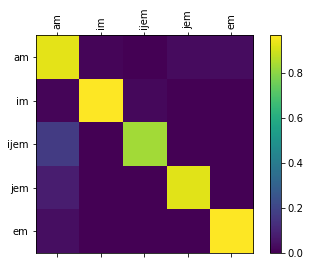

In [5]:
# evaluacija prethodno spremljenog modela
model_weights_path = 'inf2pres/results/hyperparameters/hp2/model.weights'
model = loadModel(model_weights_path)
evaluateOnTestSet(model, test_set,sve_kategorije)

prezent završava na: am


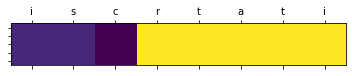

prezent završava na: am


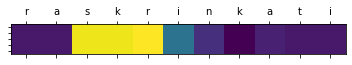

prezent završava na: am


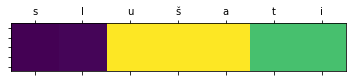

prezent završava na: im


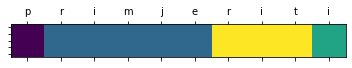

prezent završava na: im


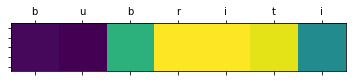

prezent završava na: im


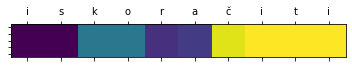

In [7]:
glagoli = ['iscrtati','raskrinkati','slušati','primjeriti','bubriti','iskoračiti']


#napravi heatmap
_ = [heatmap(model,gl) for gl in glagoli ]

### Primjeri s prezentskom osnovom 'im'

prezent završava na: em


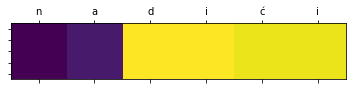

prezent završava na: em


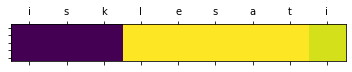

prezent završava na: em


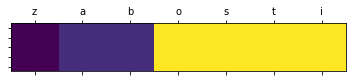

prezent završava na: em


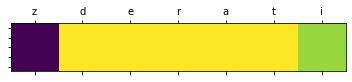

prezent završava na: em


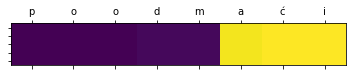

prezent završava na: em


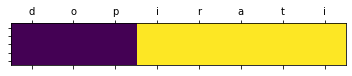

prezent završava na: em


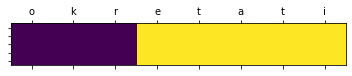

prezent završava na: em


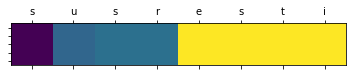

prezent završava na: em


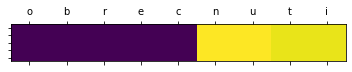

prezent završava na: am


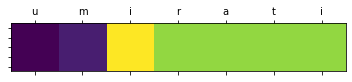

In [6]:
glagoli = ['nadići', 'isklesati','zabosti','zderati','poodmaći','dopirati','okretati','susresti','obrecnuti','umirati']


#napravi heatmap
_ = [heatmap(model,gl) for gl in glagoli ]